In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../data/kidney_disease.csv')

In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


ckd=chronic kidney disease

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [7]:
data.classification=data.classification.replace("ckd\t","ckd") 

In [8]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [9]:
data.drop('id', axis = 1, inplace = True)

In [10]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])

In [12]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [13]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [14]:
df = data.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)


In [15]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [16]:
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [17]:
for i in df['wc']:
    print(i)

6700
12100
4500
11000
9200
6900
9600
18900
7200
14600
6400
	6200
3800
9800
12500
5600
7000
15200
5000
16300
	8400
10500
15200
14600
7900
10900
12800
12400
19100
7500
16700
9600
26400
9800
8800
7400
12000
7500
15700
11500
5000
10200
5400
10400
9800
9100
6200
8300
9200
10700
9100
8400
4300
9400
5600
7200
8600
5000
10500
6800
9500
6900
7200
9000
5600
4700
6300
9400
5800
9100
5500
6700
5300
9800
7100
7000
10200
6300
8600
11000
7200
6200
9100
4300
7900
6900
11000
7500
8200
9400
8100
7000
10400
9600
7800
6700
8300
10700
7800
6700
4300
10700
7500
4700
7000
6700
7300
7700
5500
8100
7900
7200
7300
9900
7000
5800
6800
6300
7400
11000
5200
6000
5800
5400
10300
9300
10500
6700
9400
10300
9300
6500
10500
9200
8000
9700
9100
6400
5400
6500
6000
5100
11000
8000
5700
6200
9500
7200
6300
5800
6600
7400
9500
6700
7800
6600
7200
6800


In [18]:
df['wc']=df['wc'].replace(["\t6200","\t8400"],[6200,8400])

In [19]:
for i in df['wc']:
    print(i)

6700
12100
4500
11000
9200
6900
9600
18900
7200
14600
6400
6200
3800
9800
12500
5600
7000
15200
5000
16300
8400
10500
15200
14600
7900
10900
12800
12400
19100
7500
16700
9600
26400
9800
8800
7400
12000
7500
15700
11500
5000
10200
5400
10400
9800
9100
6200
8300
9200
10700
9100
8400
4300
9400
5600
7200
8600
5000
10500
6800
9500
6900
7200
9000
5600
4700
6300
9400
5800
9100
5500
6700
5300
9800
7100
7000
10200
6300
8600
11000
7200
6200
9100
4300
7900
6900
11000
7500
8200
9400
8100
7000
10400
9600
7800
6700
8300
10700
7800
6700
4300
10700
7500
4700
7000
6700
7300
7700
5500
8100
7900
7200
7300
9900
7000
5800
6800
6300
7400
11000
5200
6000
5800
5400
10300
9300
10500
6700
9400
10300
9300
6500
10500
9200
8000
9700
9100
6400
5400
6500
6000
5100
11000
8000
5700
6200
9500
7200
6300
5800
6600
7400
9500
6700
7800
6600
7200
6800


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [21]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int64  
 16  wc              158 non-null    int64  
 17  rc              158 non-null    flo

In [22]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
1,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes
2,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no
3,normal,abnormal,present,present,yes,yes,yes,poor,yes,no
4,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes


In [23]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [24]:
df=df.replace(dictonary)

In [25]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


<Axes: >

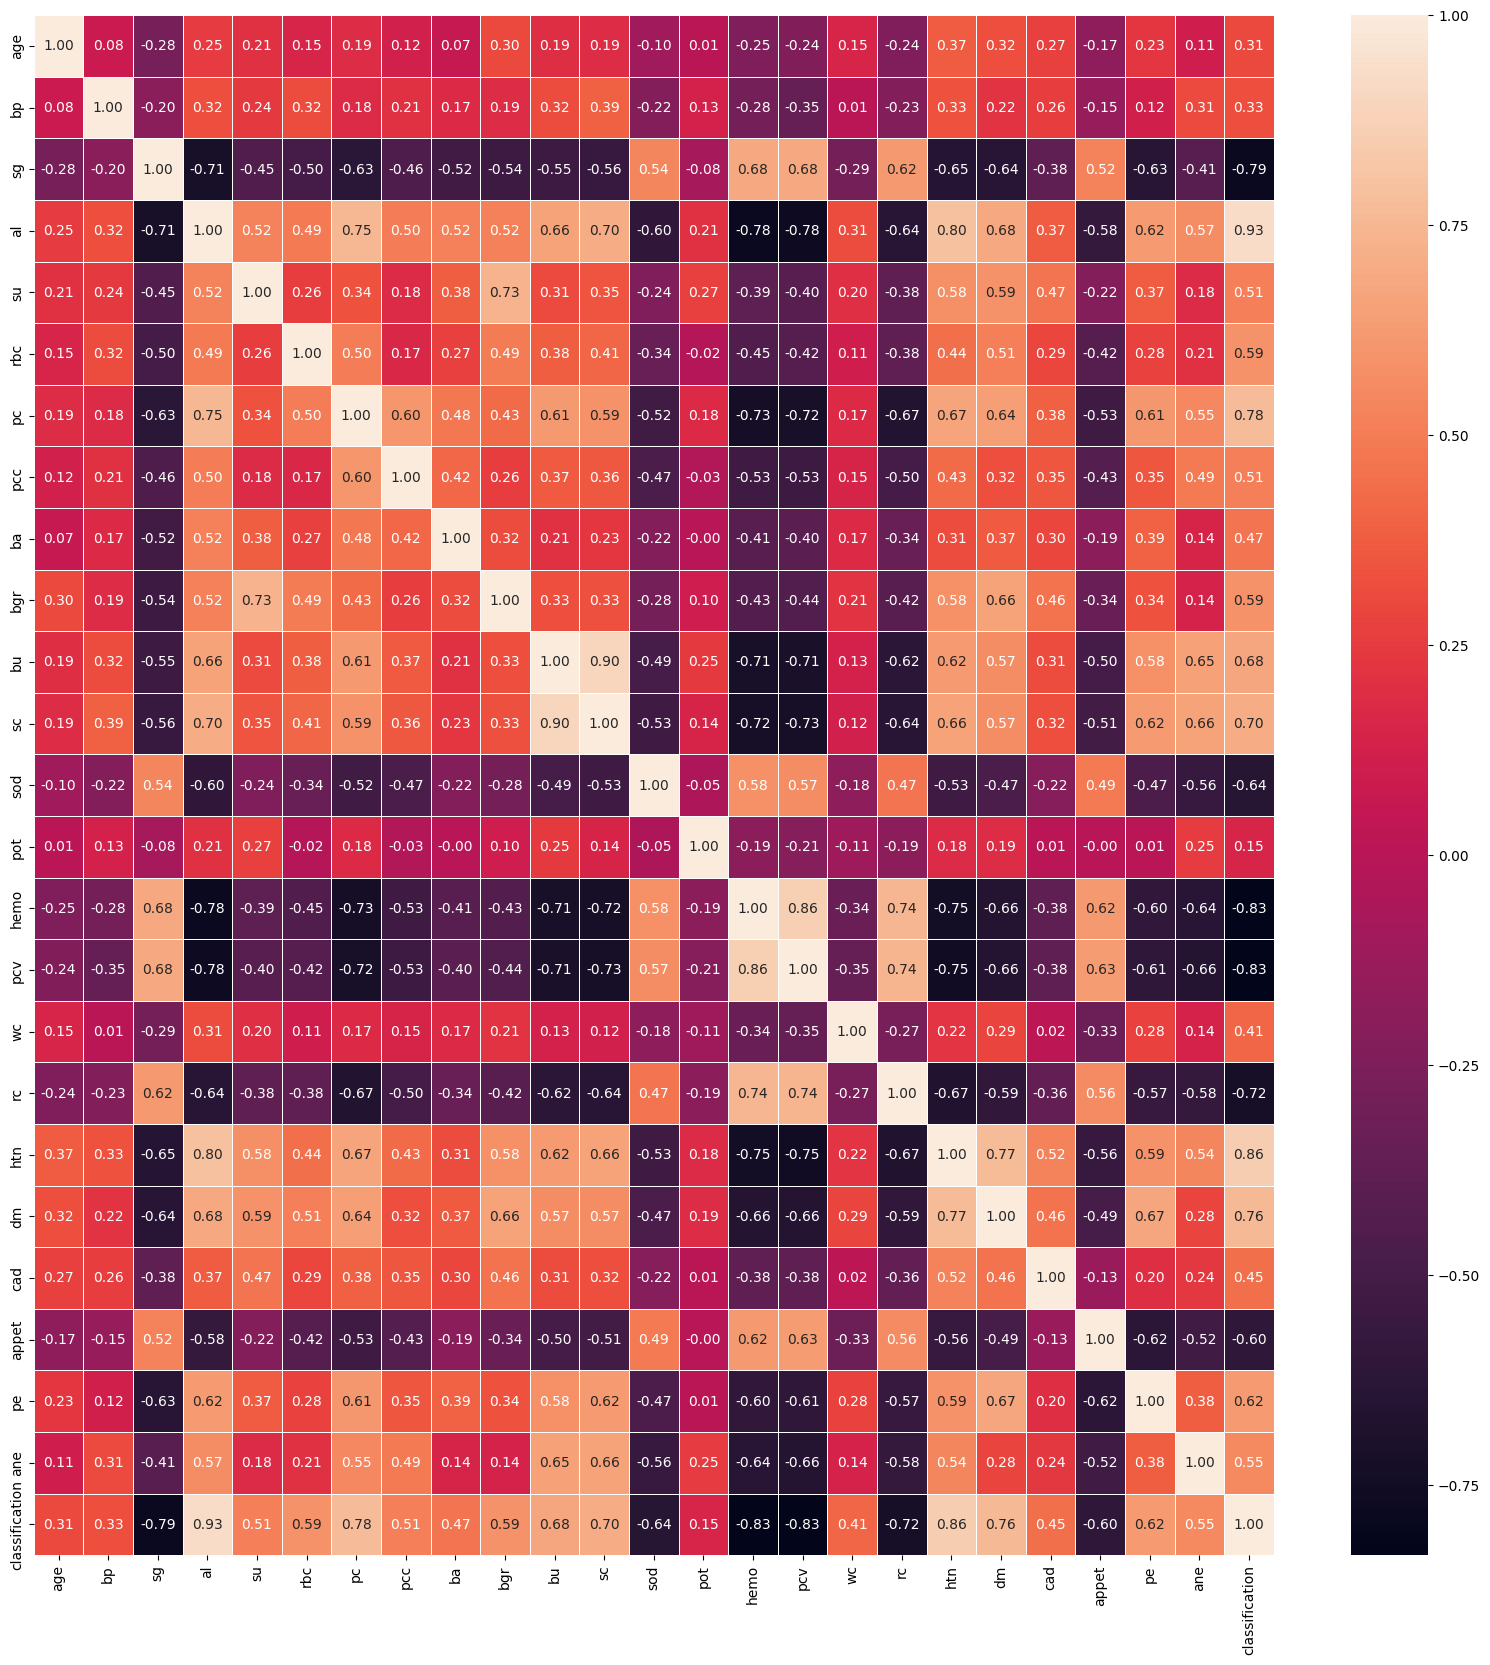

In [26]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [27]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.079712,-0.277303,0.253380,0.207711,0.147971,0.188907,0.124032,0.068353,0.301915,...,-0.235116,0.153132,-0.242235,0.372348,0.323957,0.269868,-0.170259,0.232327,0.105809,0.305119
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,0.316670,0.179834,0.206507,0.174555,0.190113,...,-0.353504,0.008274,-0.228533,0.334951,0.218096,0.257709,-0.145047,0.117878,0.311097,0.326567
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.500494,-0.630323,-0.460050,-0.516392,-0.544781,...,0.678472,-0.288930,0.619092,-0.648168,-0.639391,-0.379305,0.523944,-0.633622,-0.413252,-0.790102
al,0.253380,0.322507,-0.712331,1.000000,0.521448,0.489941,0.752956,0.503341,0.516104,0.518123,...,-0.775528,0.314574,-0.640099,0.796876,0.678582,0.374755,-0.578080,0.622268,0.569529,0.925816
su,0.207711,0.243828,-0.448477,0.521448,1.000000,0.256568,0.335901,0.177327,0.381929,0.730050,...,-0.404821,0.201000,-0.377726,0.577286,0.591010,0.466658,-0.220547,0.374128,0.179811,0.510615
rbc,0.147971,0.316670,-0.500494,0.489941,0.256568,1.000000,0.498959,0.168592,0.273177,0.493857,...,-0.422537,0.108857,-0.379378,0.442400,0.511777,0.293269,-0.418639,0.282868,0.209797,0.586391
pc,0.188907,0.179834,-0.630323,0.752956,0.335901,0.498959,1.000000,0.600092,0.481227,0.430646,...,-0.718042,0.169936,-0.667113,0.666767,0.636288,0.384223,-0.528435,0.606234,0.545380,0.775388
pcc,0.124032,0.206507,-0.460050,0.503341,0.177327,0.168592,0.600092,1.000000,0.415033,0.257768,...,-0.534564,0.146742,-0.499401,0.432876,0.321900,0.352255,-0.432515,0.350171,0.485941,0.509915
ba,0.068353,0.174555,-0.516392,0.516104,0.381929,0.273177,0.481227,0.415033,1.000000,0.318095,...,-0.397500,0.170071,-0.343299,0.314961,0.367477,0.297063,-0.187815,0.393819,0.141344,0.468845
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,0.493857,0.430646,0.257768,0.318095,1.000000,...,-0.443818,0.212093,-0.418085,0.579407,0.663012,0.459164,-0.338924,0.336141,0.139854,0.591217


In [28]:
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = df['classification']

In [29]:
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X

,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,sc,pot,wc,htn,dm,cad,pe,ane
0,48.0,70.0,4.0,0.0,0,1,1,0,117.0,56.0,3.8,2.5,6700,1,0,0,1,1
1,53.0,90.0,2.0,0.0,1,1,1,0,70.0,107.0,7.2,3.7,12100,1,1,0,0,1
2,63.0,70.0,3.0,0.0,1,1,1,0,380.0,60.0,2.7,4.2,4500,1,1,0,1,0
3,68.0,80.0,3.0,2.0,0,1,1,1,157.0,90.0,4.1,6.4,11000,1,1,1,1,0
4,61.0,80.0,2.0,0.0,1,1,0,0,173.0,148.0,3.9,5.2,9200,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,80.0,0.0,0.0,0,0,0,0,140.0,49.0,0.5,4.9,6700,0,0,0,0,0
154,42.0,70.0,0.0,0.0,0,0,0,0,75.0,31.0,1.2,3.5,7800,0,0,0,0,0
155,12.0,80.0,0.0,0.0,0,0,0,0,100.0,26.0,0.6,4.4,6600,0,0,0,0,0
156,17.0,60.0,0.0,0.0,0,0,0,0,114.0,50.0,1.0,4.9,7200,0,0,0,0,0


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
confusion_matrix(y_test, model.predict(X_test))

array([[23,  0],
       [ 0,  9]])

In [37]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 100.0%


In [38]:
import pickle
pickle.dump(model, open('../models/kidneyDisease.pkl', 'wb'))

In [39]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# import joblib

# # Load the dataset
# file_path = "../data/kidney_disease.csv"
# df = pd.read_csv(file_path)

# # Drop non-numeric columns (if any) and fill missing values
# df = df.select_dtypes(include=['number']).fillna(0)

# # Initialize and fit the scaler on all numeric features
# scaler = StandardScaler()
# scaler.fit(df)

# # Save the updated scaler
# scaler_path = "../models/kidney_scaler.pkl"
# joblib.dump(scaler, scaler_path)

# # Check the number of features scaler was trained on
# num_features = df.shape[1]
# scaler_path, num_features


In [40]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn.impute import SimpleImputer
# import pickle

# # Load data
# df = pd.read_csv('../data/kidney_disease.csv')
# df['classification'] = df['classification'].apply(lambda x: 'ckd' if 'ckd' in x else 'notckd')

# # Handle missing values and incorrect entries
# df.replace({'?': np.nan, '\t?': np.nan, '\tyes': 'yes', '\tno': 'no'}, inplace=True)

# # Convert categorical columns
# cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
# for col in cat_cols:
#     df[col] = df[col].str.strip()
#     df[col] = df[col].replace({'normal': 1, 'abnormal': 0, 'yes': 1, 'no': 0, 
#                               'present': 1, 'notpresent': 0, 'good': 1, 'poor': 0})

# # Convert numerical columns
# num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
# df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# # Impute missing values
# num_imputer = SimpleImputer(strategy='mean')
# cat_imputer = SimpleImputer(strategy='most_frequent')

# df[num_cols] = num_imputer.fit_transform(df[num_cols])
# df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# # Prepare features and target
# X = df.drop(['id', 'classification'], axis=1)
# y = df['classification'].map({'ckd': 1, 'notckd': 0})

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Save model and preprocessing objects
# with open('../models/kidney_model.pkl', 'wb') as f:
#     pickle.dump(model, f)
    
# with open('../models/preprocessing.pkl', 'wb') as f:
#     pickle.dump((num_imputer, cat_imputer, num_cols, cat_cols), f)